<a href="https://colab.research.google.com/github/Sewanmpm/SlumImprovment/blob/main/molecular/Copy_of_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy pandas matplotlib seaborn opencv-python scikit-image tensorflow


In [ ]:
import numpy as np


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image1 = cv2.imread('/root/WhatsApp Image 2024-05-08 at 14.48.54.jpeg')
# cv2_imshow(image)


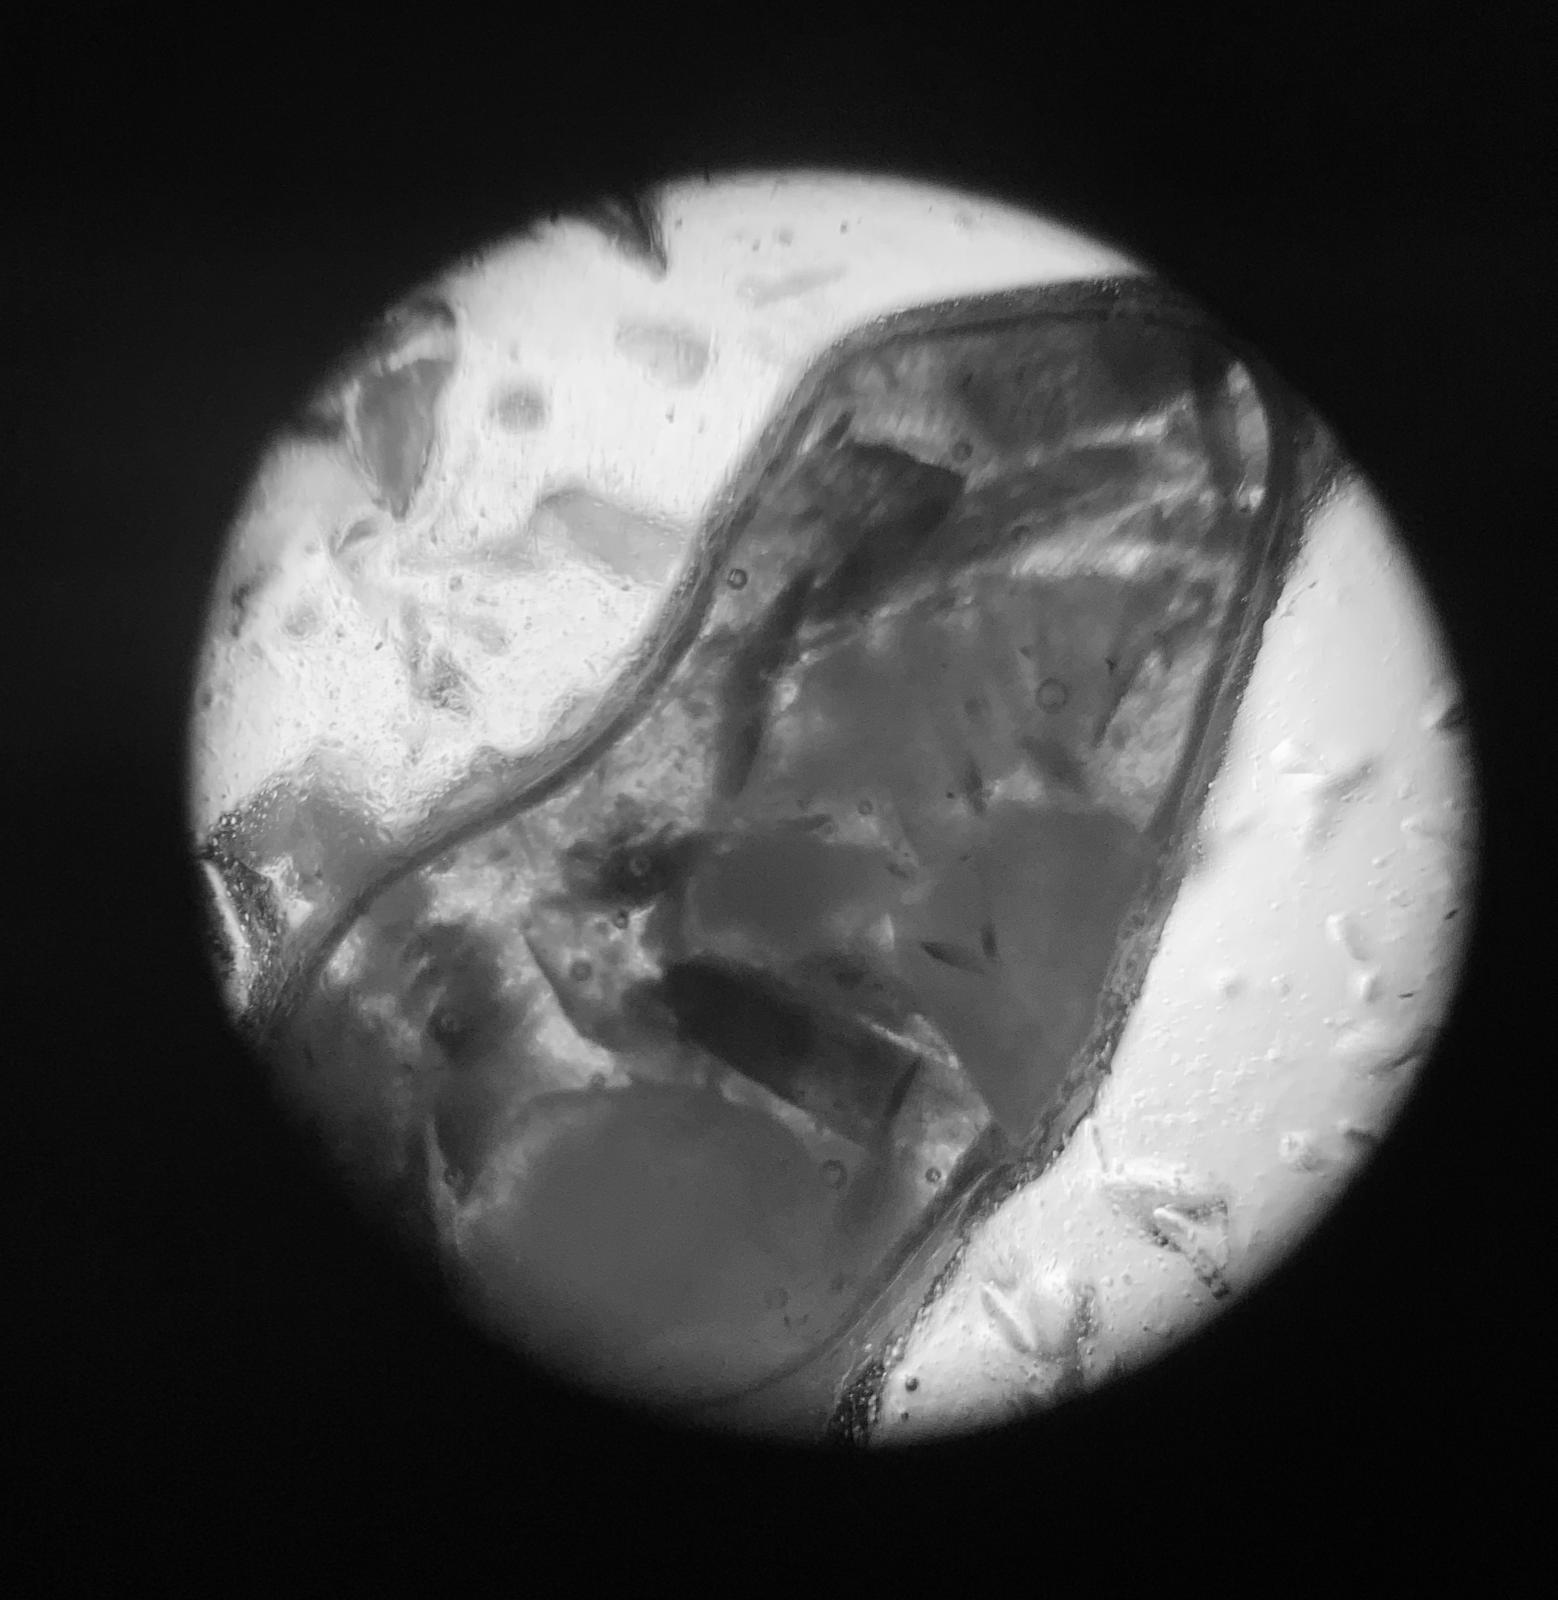

In [ ]:
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image1)


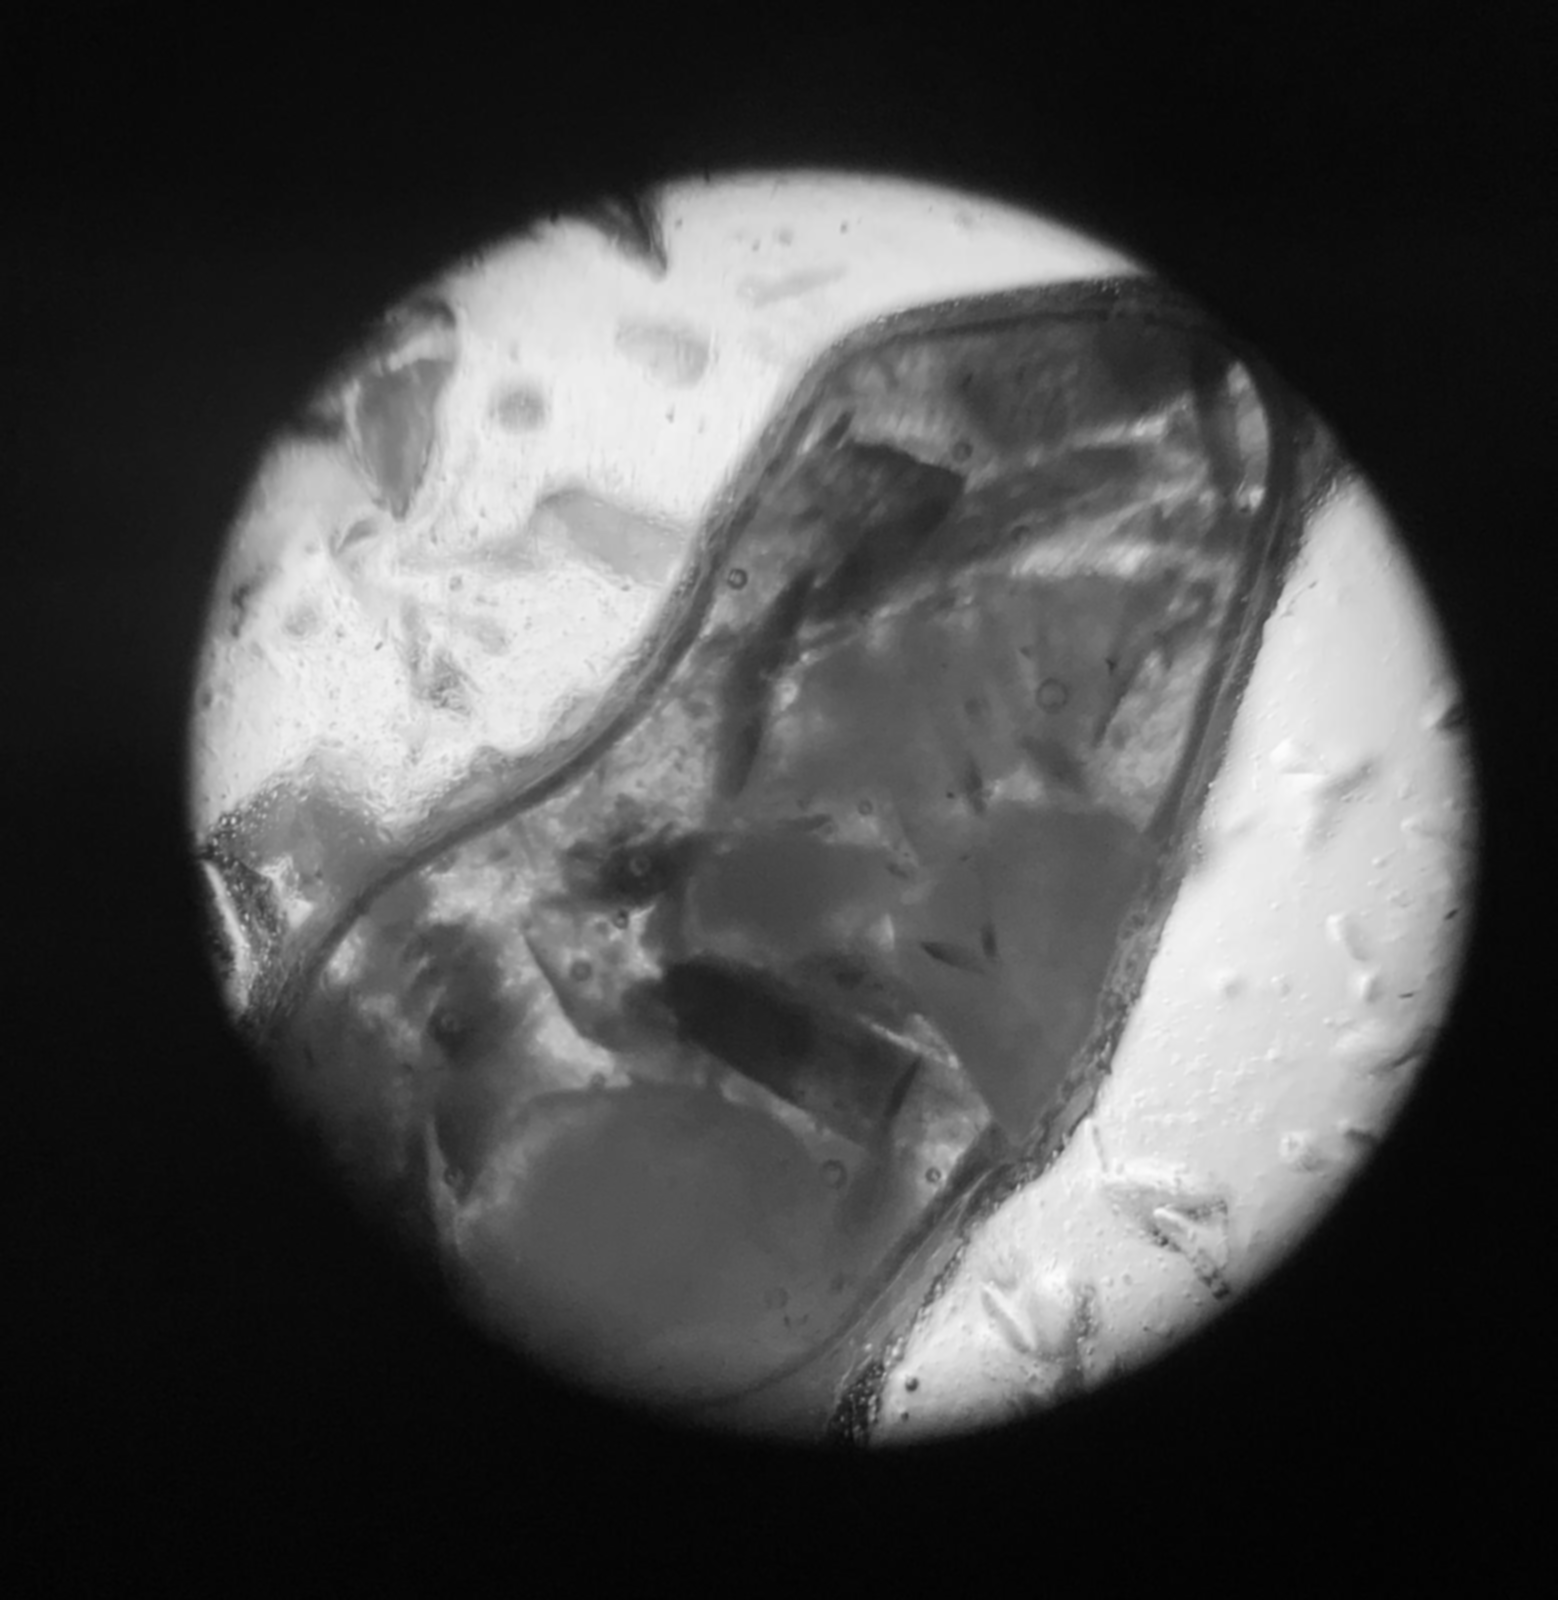

In [ ]:
blurred_image1 = cv2.GaussianBlur(gray_image1, (5, 5), 0)
cv2_imshow(blurred_image1)

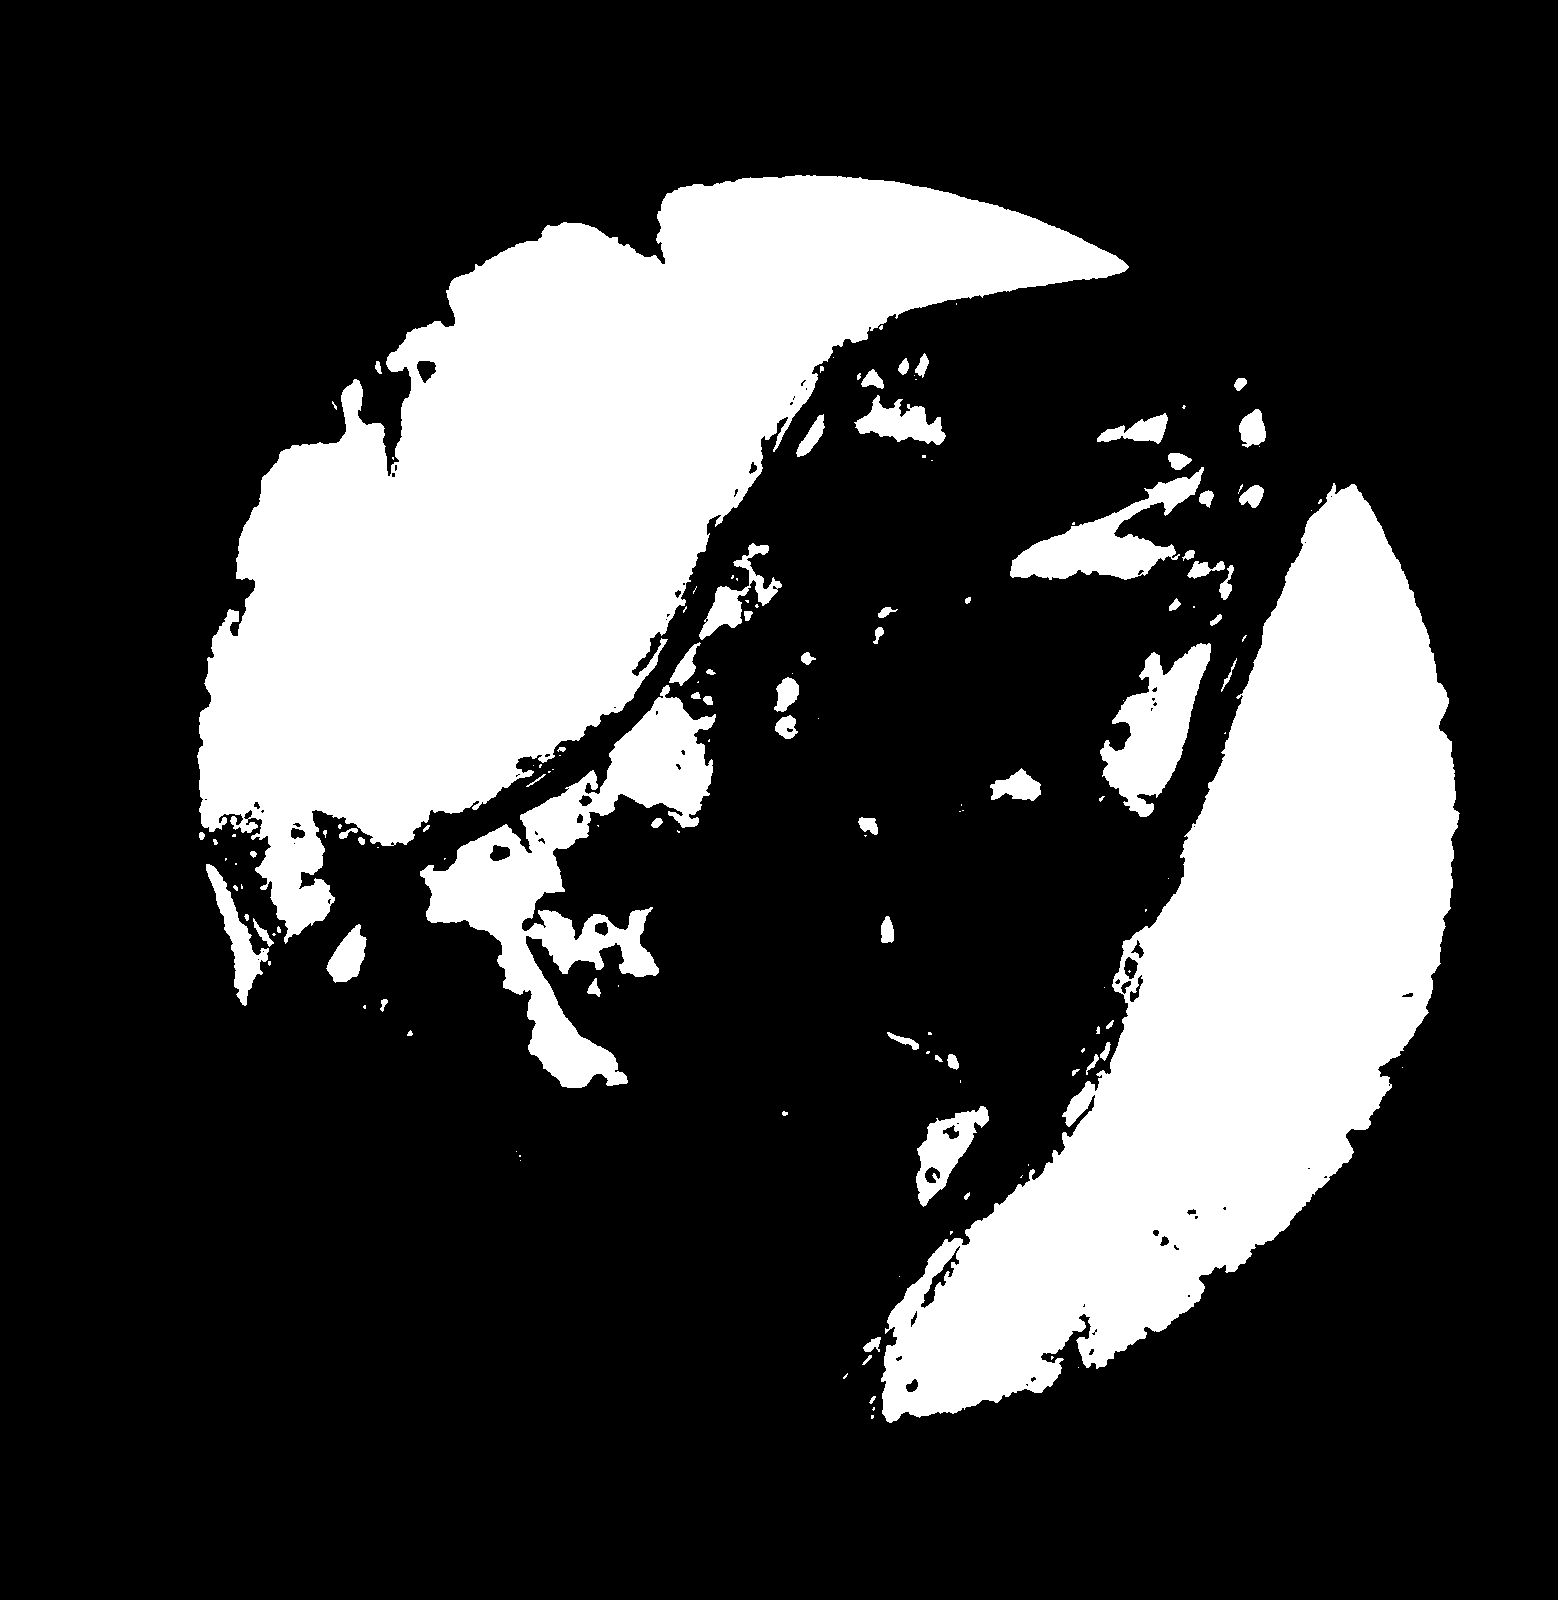

In [ ]:
_, binary_image1 = cv2.threshold(blurred_image1, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image1)

edges1 = cv2.Canny(binary_image1, 100, 200)
edges2 = cv2.Canny(binary_image2, 100, 200)

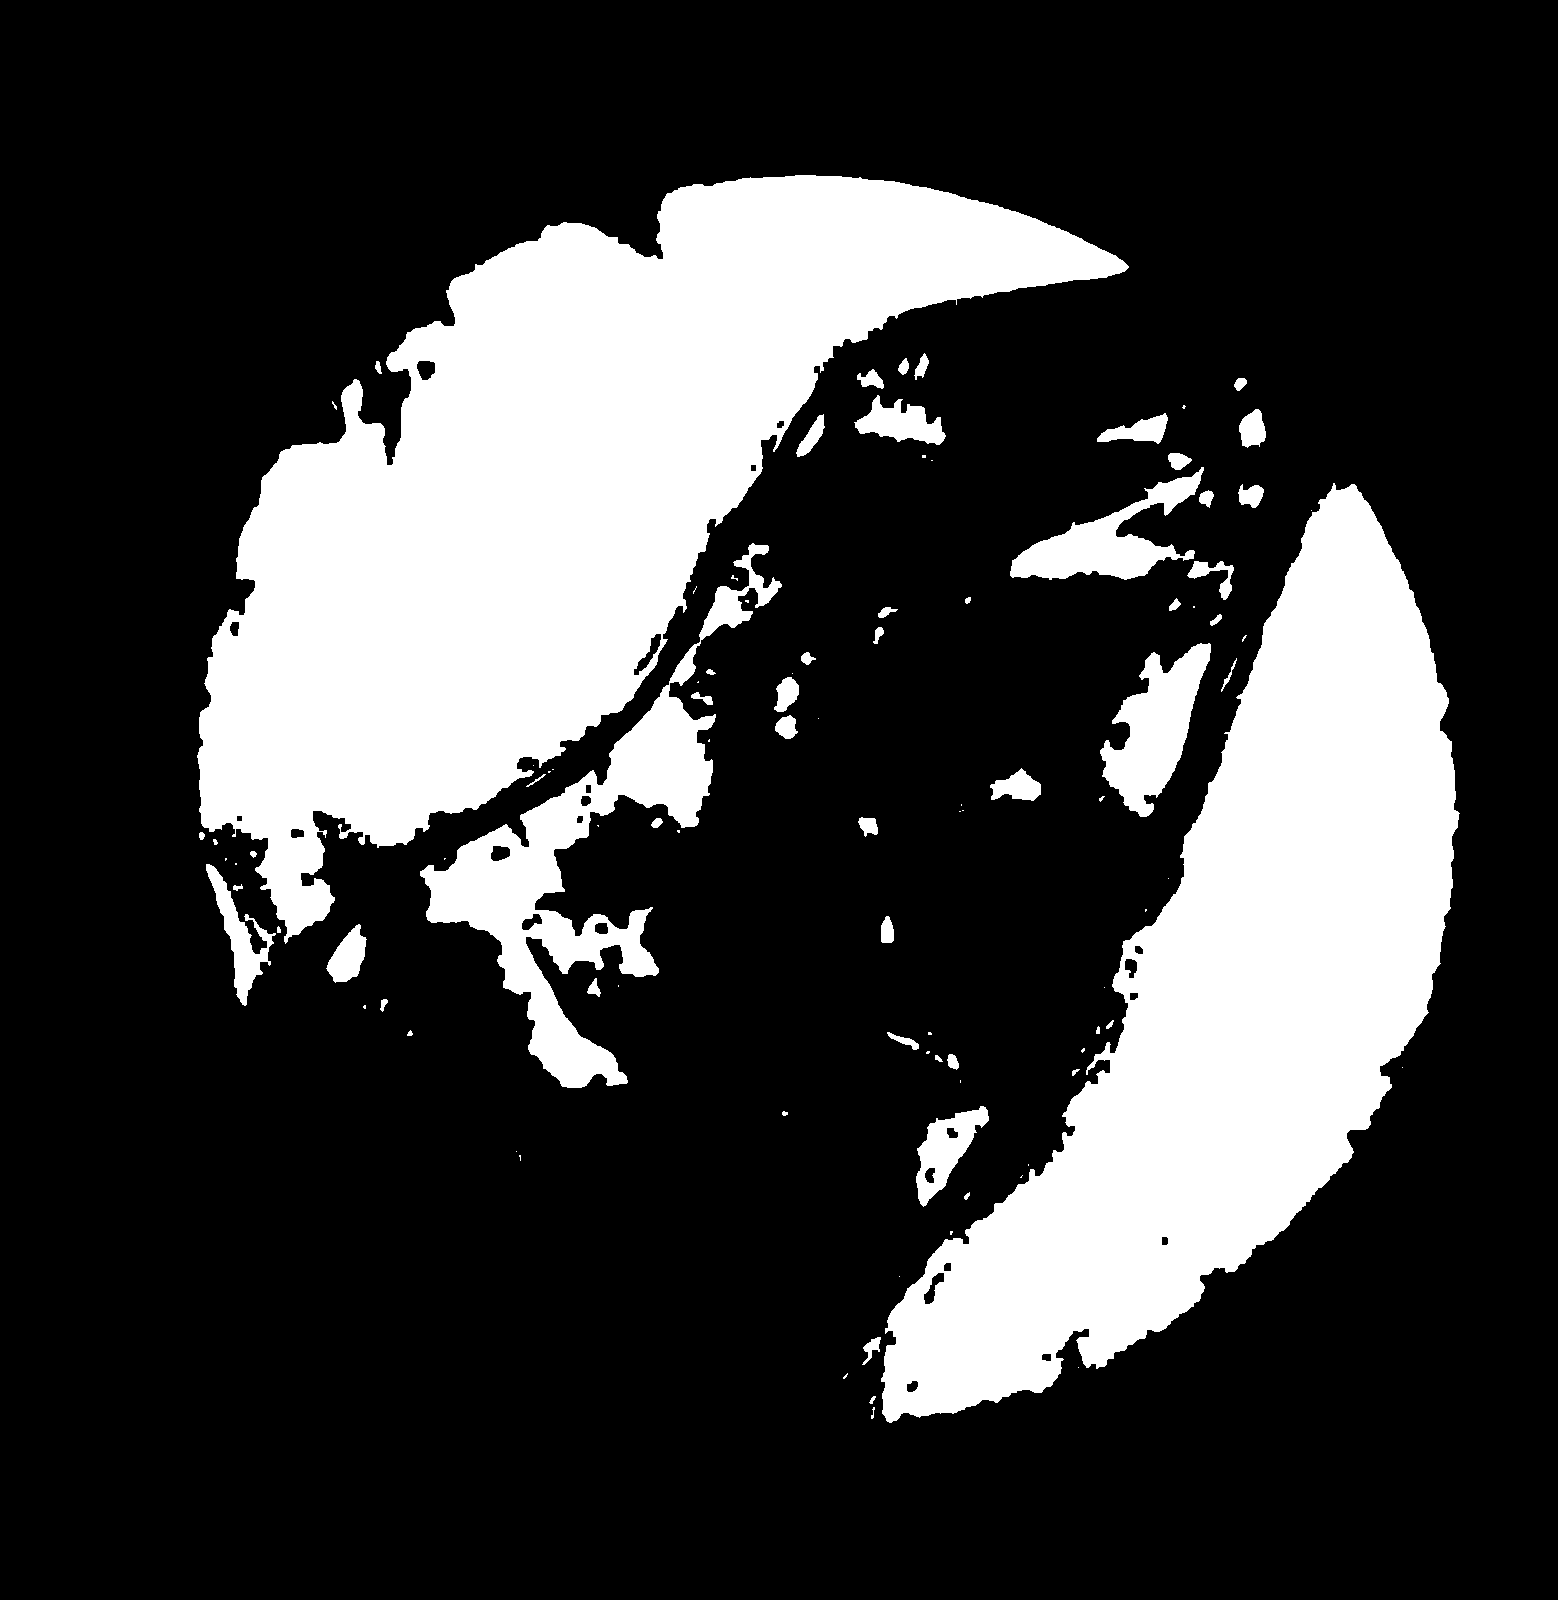

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Assuming 'binary_image' is already defined from previous steps:
kernel = np.ones((5, 5), np.uint8)
closing1 = cv2.morphologyEx(binary_image1, cv2.MORPH_CLOSE, kernel)
# Now display the result
cv2_imshow(closing1)

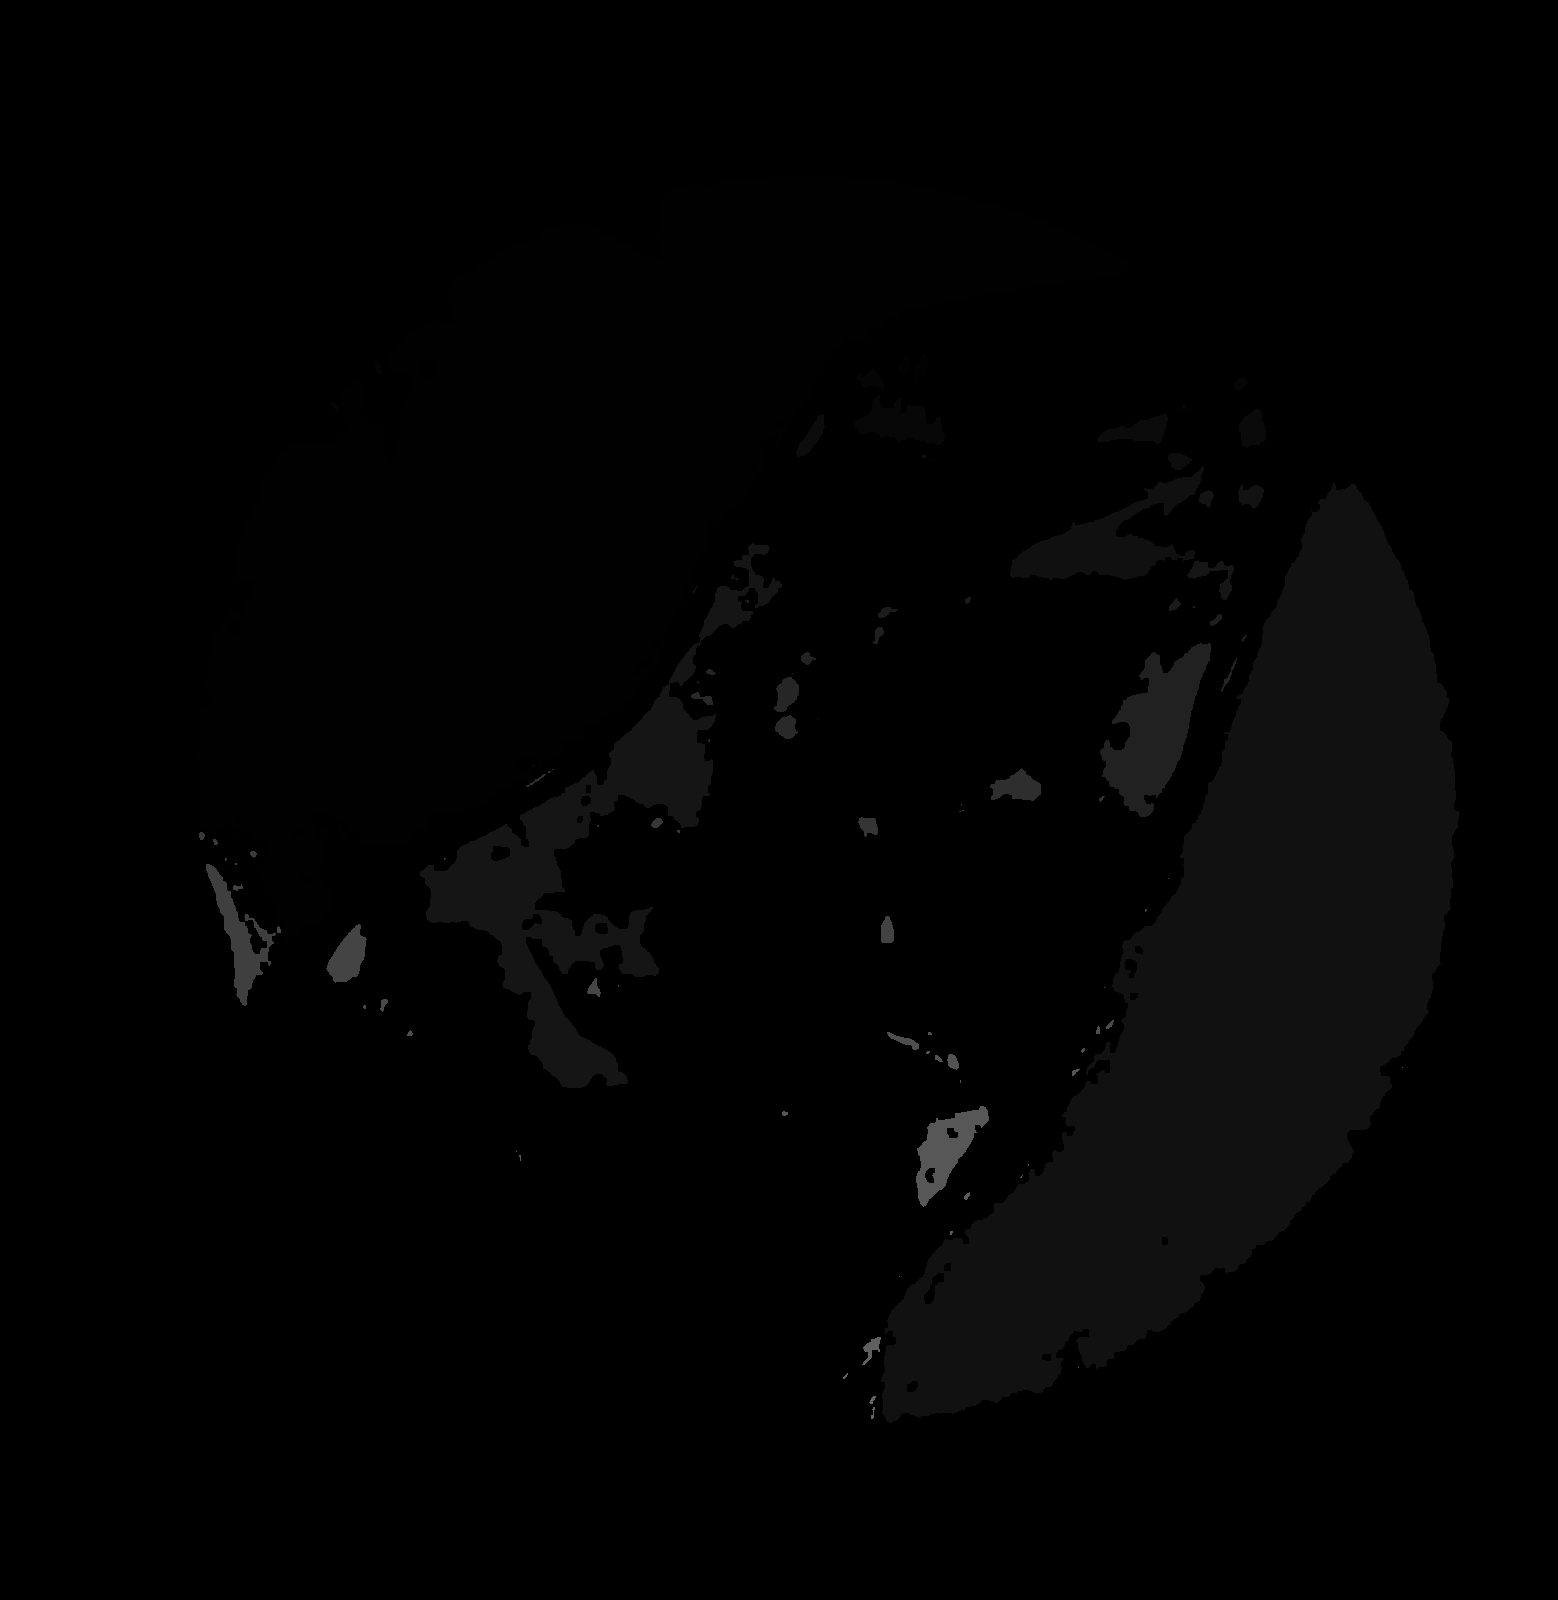

In [ ]:
num_labels, labels_im1 = cv2.connectedComponents(closing1)
cv2_imshow(labels_im1)  # Display edges

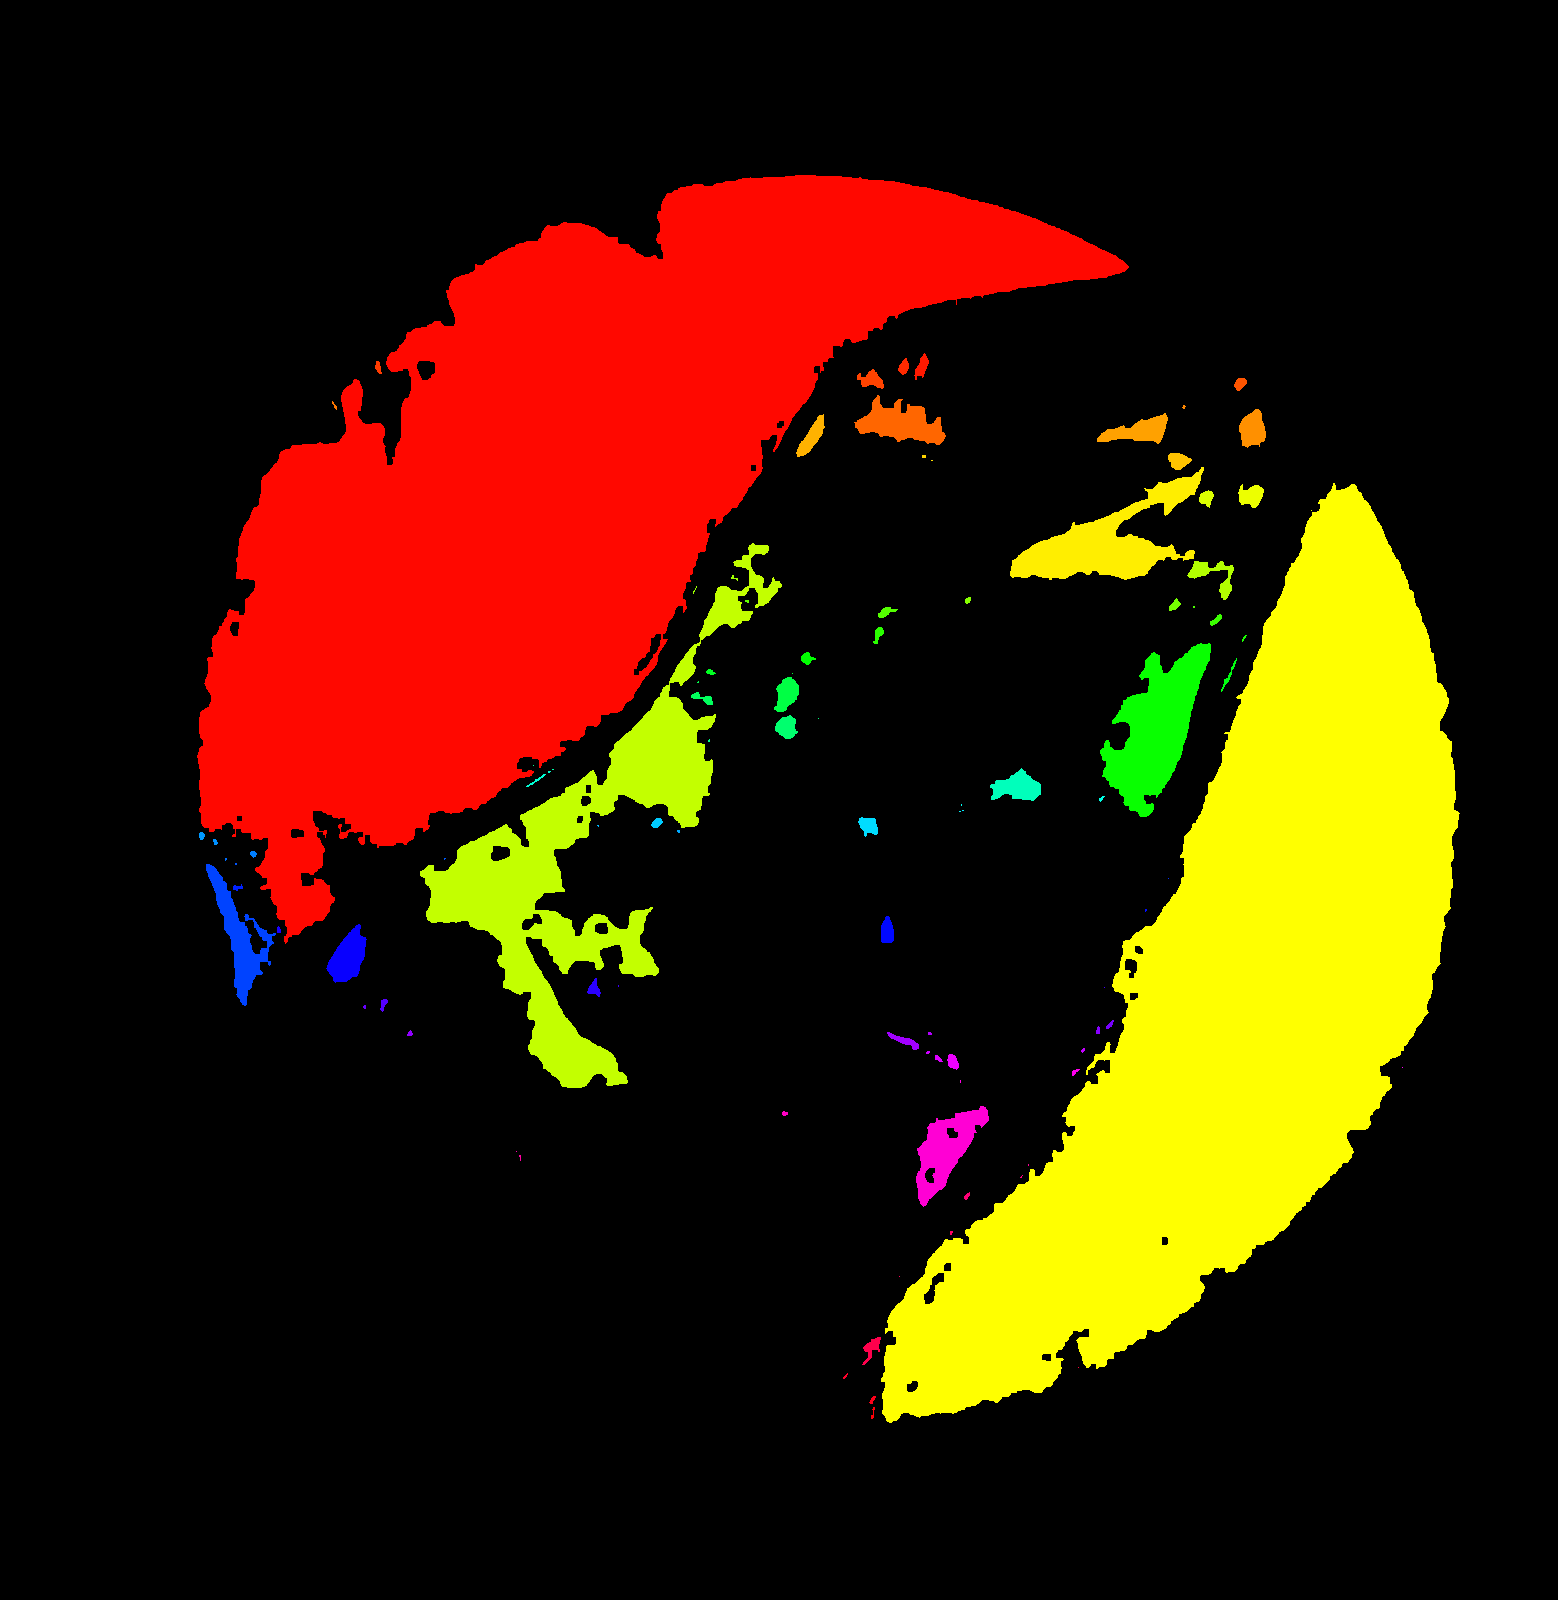

In [ ]:
from google.colab.patches import cv2_imshow

# Display the result of connected components with modification for Google Colab
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2_imshow(labeled_img)  # Use cv2_imshow instead of cv2.imshow

imshow_components(labels_im1)


In [ ]:
num_components = num_labels - 1  # ignoring background
stats = np.zeros((num_components, 5))  # to store area, centroid, etc.

for i in range(1, num_labels):  # start from 1 to ignore the background
    component_mask = (labels_im1 == i).astype("uint8")  # isolate the component
    area = cv2.countNonZero(component_mask)
    M = cv2.moments(component_mask)
    centroid_x = int(M["m10"] / M["m00"])
    centroid_y = int(M["m01"] / M["m00"])
    stats[i - 1, :] = [area, centroid_x, centroid_y, 0, 0]  # store features, add more as needed

print(stats)


[[2.84954e+05 5.49000e+02 4.95000e+02 0.00000e+00 0.00000e+00]
 [2.03000e+02 9.21000e+02 3.66000e+02 0.00000e+00 0.00000e+00]
 [1.21000e+02 9.03000e+02 3.66000e+02 0.00000e+00 0.00000e+00]
 [5.80000e+01 3.77000e+02 3.67000e+02 0.00000e+00 0.00000e+00]
 [3.01000e+02 8.70000e+02 3.79000e+02 0.00000e+00 0.00000e+00]
 [1.17000e+02 1.23900e+03 3.83000e+02 0.00000e+00 0.00000e+00]
 [2.42000e+03 9.00000e+02 4.23000e+02 0.00000e+00 0.00000e+00]
 [1.80000e+01 3.34000e+02 4.05000e+02 0.00000e+00 0.00000e+00]
 [1.00000e+01 1.18300e+03 4.06000e+02 0.00000e+00 0.00000e+00]
 [7.51000e+02 1.25200e+03 4.28000e+02 0.00000e+00 0.00000e+00]
 [1.13100e+03 1.13800e+03 4.30000e+02 0.00000e+00 0.00000e+00]
 [5.18000e+02 8.11000e+02 4.36000e+02 0.00000e+00 0.00000e+00]
 [2.79000e+02 1.17800e+03 4.60000e+02 0.00000e+00 0.00000e+00]
 [1.20000e+01 9.23000e+02 4.56000e+02 0.00000e+00 0.00000e+00]
 [2.00000e+00 9.31000e+02 4.60000e+02 0.00000e+00 0.00000e+00]
 [7.93700e+03 1.10600e+03 5.41000e+02 0.00000e+00 0.000

In [ ]:
# Example: Classifying based on area
def classify_based_on_area(stats, small_threshold, large_threshold):
    classifications = []
    for stat in stats:
        area = stat[0]  # Assuming the first column in stats is the area
        if area < small_threshold:
            classifications.append('Small')
        elif area > large_threshold:
            classifications.append('Large')
        else:
            classifications.append('Medium')
    return classifications

# Example thresholds
small_threshold = 50
large_threshold = 200
classifications = classify_based_on_area(stats, small_threshold, large_threshold)
print(classifications)


['Large', 'Large', 'Medium', 'Medium', 'Large', 'Medium', 'Large', 'Small', 'Small', 'Large', 'Large', 'Large', 'Large', 'Small', 'Small', 'Large', 'Large', 'Large', 'Medium', 'Small', 'Large', 'Large', 'Small', 'Small', 'Small', 'Medium', 'Small', 'Medium', 'Small', 'Medium', 'Medium', 'Small', 'Large', 'Medium', 'Medium', 'Small', 'Small', 'Large', 'Small', 'Medium', 'Large', 'Small', 'Small', 'Small', 'Small', 'Large', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Large', 'Medium', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Large', 'Small', 'Small', 'Small', 'Large', 'Large', 'Small', 'Medium', 'Small', 'Small', 'Medium', 'Small', 'Small', 'Small', 'Small', 'Medium', 'Small', 'Small', 'Small', 'Small', 'Medium', 'Small', 'Small', 'Small', 'Large', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Large', 'Small', 'Small', 'Small', 'Small']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example data
features = np.array([stat[:3] for stat in stats])  # Using the first three features: area, centroid_x, centroid_y
labels = np.random.choice(['Class1', 'Class2', 'Class3'], size=len(features))  # Replace with your actual labels

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Displaying prediction examples
print("Predicted classes:", y_pred[:10])
print("Actual classes:", y_test[:10])


Accuracy: 0.25
Predicted classes: ['Class3' 'Class1' 'Class1' 'Class1' 'Class1' 'Class3' 'Class3' 'Class2'
 'Class1' 'Class2']
Actual classes: ['Class2' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class2' 'Class1']


In [ ]:
import numpy as np

# Assuming 'stats' holds features, and 'classifications' from the previous classification task
# For simulation, let's say we are modeling the effect of temperature on cell survival rate.

def simulate_temperature_effect(classifications, initial_temp, final_temp, temp_step):
    results = []
    for temp in range(initial_temp, final_temp, temp_step):
        survival_rate = []
        for i, classification in enumerate(classifications):
            if classification == 'Class1':
                # Assume survival decreases with temperature for Class1
                survival = max(0, 100 - (temp - 20) * 0.5)  # Simplified model
            elif classification == 'Class2':
                # Assume survival increases to a point then decreases for Class2
                survival = max(0, 100 - abs(temp - 40) * 0.75)
            else:
                # Stable survival rate for Class3
                survival = 95
            survival_rate.append(survival)
        results.append((temp, np.mean(survival_rate)))
    return results

# Run the simulation
simulation_results = simulate_temperature_effect(classifications, 20, 50, 5)
print(simulation_results)


[(20, 95.0), (25, 95.0), (30, 95.0), (35, 95.0), (40, 95.0), (45, 95.0)]


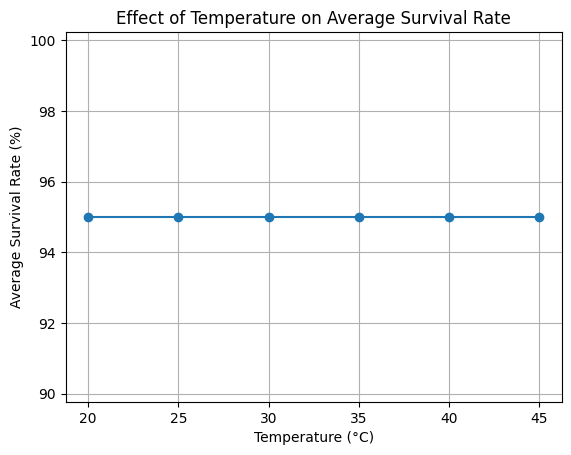

In [ ]:
import matplotlib.pyplot as plt

# Plotting simulation results
temperatures = [result[0] for result in simulation_results]
survival_rates = [result[1] for result in simulation_results]

plt.plot(temperatures, survival_rates, marker='o')
plt.title('Effect of Temperature on Average Survival Rate')
plt.xlabel('Temperature (°C)')
plt.ylabel('Average Survival Rate (%)')
plt.grid(True)
plt.show()


In [ ]:
def simulate_temperature_effect(classifications, initial_temp, final_temp, temp_step):
    # Initialize dictionary for all classes found in classifications
    unique_classes = set(classifications)
    results = {class_label: [] for class_label in unique_classes}
    overall_results = []

    for temp in range(initial_temp, final_temp + 1, temp_step):
        survival_rates = {class_label: [] for class_label in unique_classes}
        for i, classification in enumerate(classifications):
            survival = 0
            if classification == 'Large':
                # Define behavior for 'Large'
                survival = max(0, 100 - (temp - 20) * 0.5)
            elif classification == 'Small':
                # Define behavior for 'Small'
                survival = max(0, 100 - abs(temp - 40) * 0.75)
            else:
                # Define default behavior for any other class
                survival = 95

            survival_rates[classification].append(survival)

        # Calculating averages for each class and overall
        avg_by_class = {class_label: np.mean(rates) for class_label, rates in survival_rates.items()}
        overall_avg = np.mean(list(avg_by_class.values()))

        for class_label, avg in avg_by_class.items():
            results[class_label].append((temp, avg))
        overall_results.append((temp, overall_avg))

    return results, overall_results

# Run the simulation
results, overall_results = simulate_temperature_effect(classifications, -100, 100, 10)


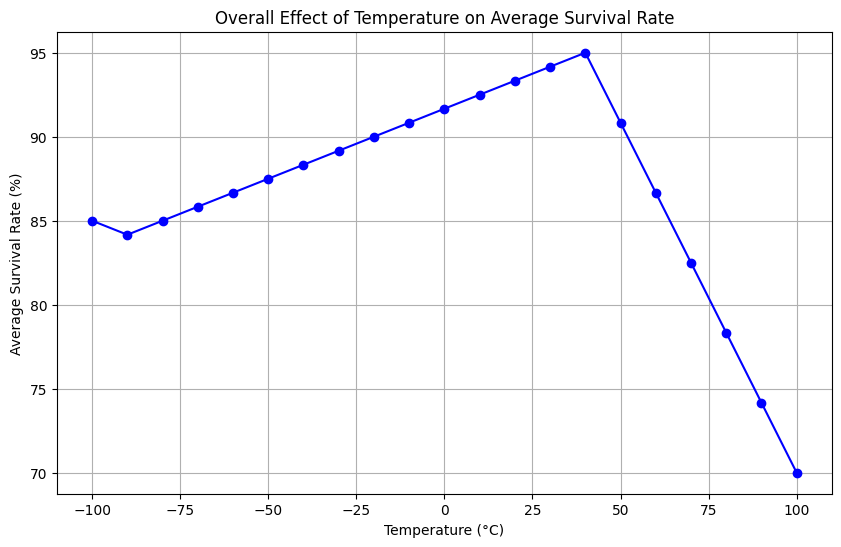

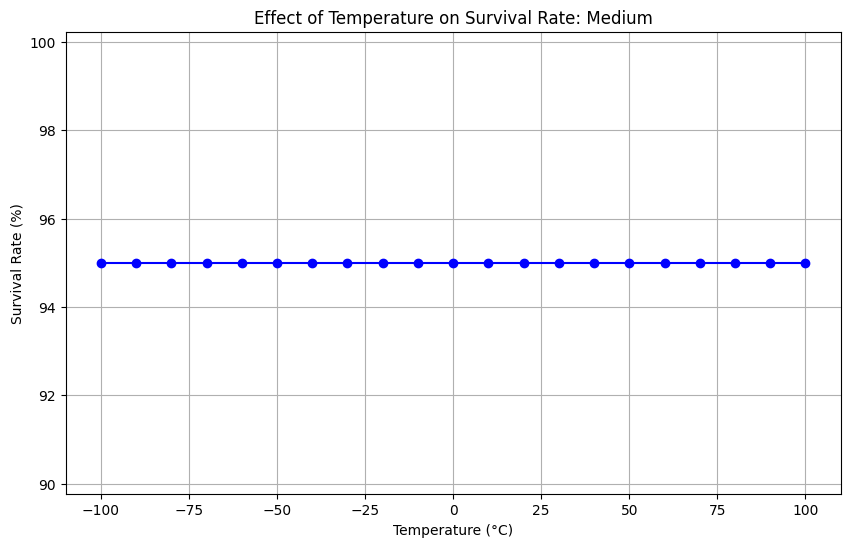

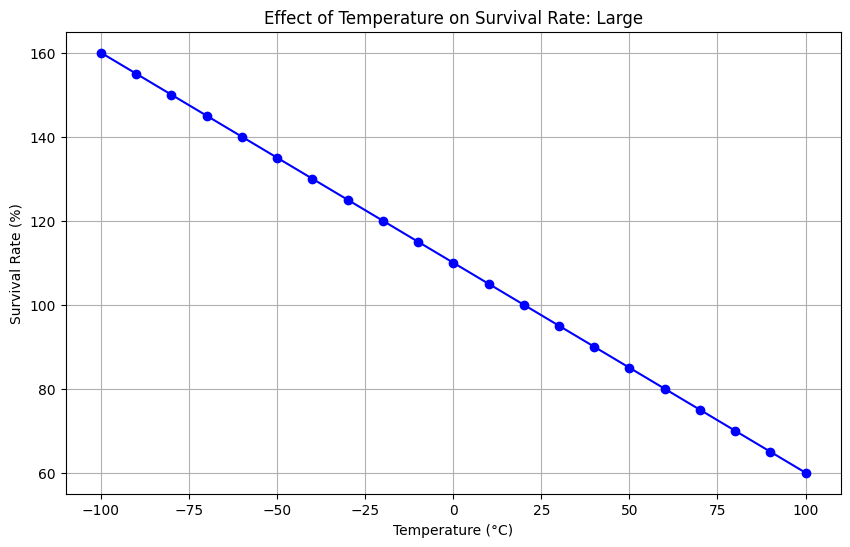

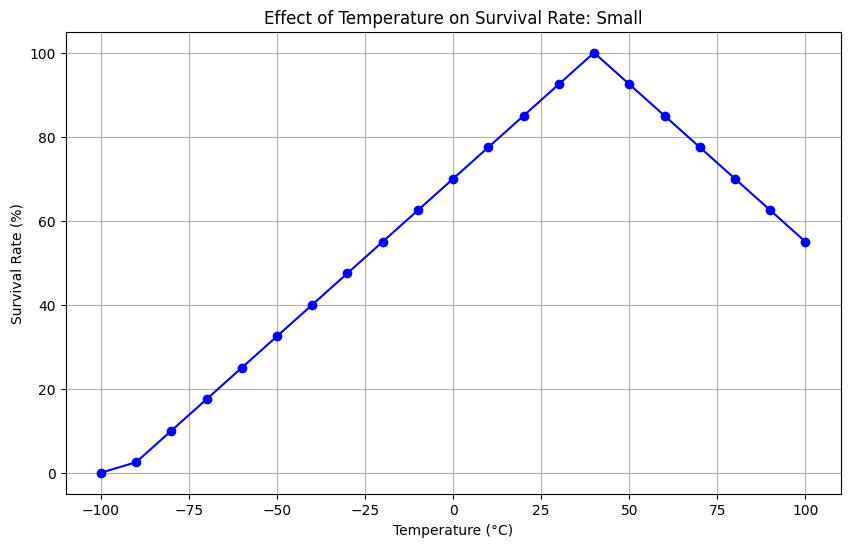

In [ ]:
import matplotlib.pyplot as plt

# Function to plot results
def plot_results(results, title, ylabel):
    temperatures = [result[0] for result in results]
    survival_rates = [result[1] for result in results]

    plt.figure(figsize=(10, 6))
    plt.plot(temperatures, survival_rates, marker='o', linestyle='-', color='blue')
    plt.title(title)
    plt.xlabel('Temperature (°C)')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Plot overall results
plot_results(overall_results, 'Overall Effect of Temperature on Average Survival Rate', 'Average Survival Rate (%)')

# Plot results for each class
for class_label, class_results in results.items():
    plot_results(class_results, f'Effect of Temperature on Survival Rate: {class_label}', 'Survival Rate (%)')
